Teste para EIS Wishart em Julia.

Modelos baseados no projeto CNPq.

Teste trivariado.

Densidade de observáveis:
$$p(y_t|\Sigma_t)\sim N(0,\Sigma_t)$$

Densidade de transição dos estados:

$$p(\Sigma_t^{-1}|\Sigma_{t-1}^{-1},v,d,C)\sim W(v,S_{t-1})$$

sendo que:

$$S_{t-1}=\frac{1}{v}(C^{1/2})(\Sigma_{t-1})^{d}(C^{1/2})^{\prime}$$

In [1]:
# Pacotes
using Distributions
using PDMats
using PyPlot
using ProfileView

# Funções
include("gen_data_Wishart.jl")
include("lik_MSV_EIS.jl")
include("nearestSPD.jl")
include("compute_Seis.jl")

# Constantes
const LOG2PI = 1.83787706640934533908193770912475883960723876953125;
const LOG2   = 0.69314718055994528622676398299518041312694549560546875;
const LOGPI  = 1.1447298858494001638774761886452324688434600830078125;


# Parametrização
const K  = 3
const T  = 240
const N  = 500
const d  = 0.5
const v  = 14
const iv = 1/v
const Arg     = v-K+1:v
const df_p1   = v+1                     # degrees of freedom from Wishart EIS initial sampler. See eq (17)
const inds    = find(tril!(ones(K,K)))
const Nb      = length(inds)            # number of estimated parameters from the covariance matrix or from the \Gamma matrix filled with (k^2+k)/2 auxiliary parameters
const ind_    = find(eye(K))            # index from a diagonal KxK matrix
const itmax   = 5;                      # maximum number of iterations;
const tol     = 0.01;                   # EIS tolerance to stop iterations;
const semente = 123456789
const adj     = -32.0
const Vini    = eye(K)./0.15

invC = PDMat([0.0238 0.0057 0.0145; 0.0057 0.0239 0.0056; 0.0145 0.0056 0.0330])
C    = inv(invC)
V0   = Vini
par  = [0.5000   14.0000    7.6761   -1.0835   -3.1890    6.6010   -1.1202    5.5048];

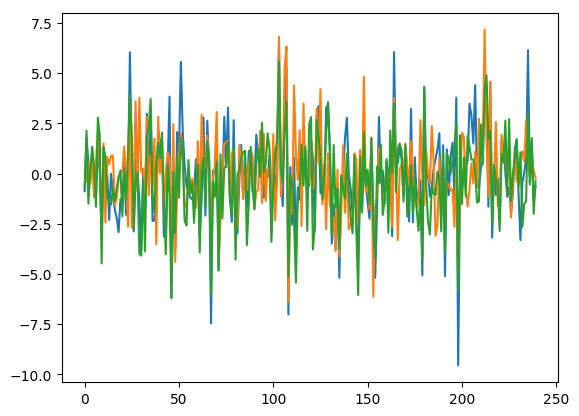

3-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x124c8d850>
 PyObject <matplotlib.lines.Line2D object at 0x124c8da10>
 PyObject <matplotlib.lines.Line2D object at 0x124c8db50>

In [2]:
# Gera base de dados
yt,Vtrue=gen_data_Wishart(K,T,d,v,semente,V0,C)
plot(yt)
# writedlm()

In [3]:
# Testa a função que calcula a verossimilhança aproximada por EIS

tempo = @elapsed loglik=lik_MSV_EIS(par,yt,Vini,N,adj,semente)


15.764291191